node degree clustering
0 4 0.3333333333333333
1 5 0.3
2 4 0.16666666666666666
3 4 0.5
4 4 0.16666666666666666
5 2 0
6 2 0
7 5 0.3
8 5 0.2
9 5 0.3

the adjacency list
0 8 2 9 1
1 2 4 9 3
2 7 6
3 9 8 7
4 7 6 8
5 8 9
6
7 9 8
8
9


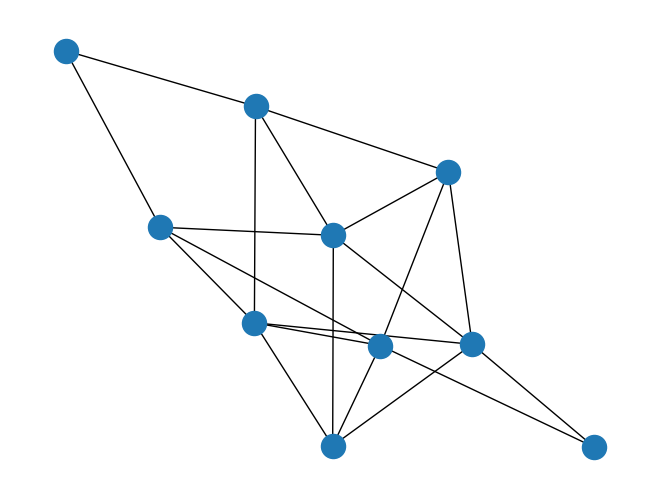

In [44]:
from functools import partial

import matplotlib.pyplot as plt
import networkx as nx
from typing import List

n = 10  # 50 nodes
m = 20  # 100 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)
# G = nx.barabasi_albert_graph(n, m, seed=seed)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()

## Testing Inner-GA

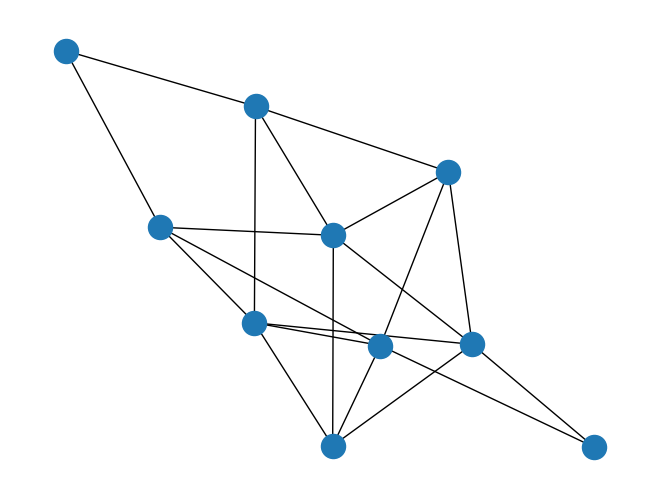

In [45]:
n = 10  # 50 nodes
m = 20  # 100 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()

In [47]:
import numpy as np
links = [x for x in G.edges()]
capacity =  np.array([randint(100, 350) for _ in range(len(links))])
flow = np.array([uniform(1, x*0.95) for x in capacity])

In [48]:
def generate_population(size: int, capacity: list):
    population = []
    for _ in range(size):
        population.append([uniform(1, x*0.95) for x in capacity])
    return np.array(population)

In [50]:
population = generate_population(20, capacity)

In [51]:
population

array([[ 53.69826154,  94.52626173, 145.73515483,  19.53062453,
         96.09353406, 169.96097578,  48.99910007,  13.82296085,
         25.09794653,  80.72848684, 111.06665021, 258.04096287,
        163.11797962,  96.92855518, 188.09832768, 247.68951559,
         79.66474318,  35.1803839 ,   1.66824259,  78.0299073 ],
       [ 62.97218682, 262.99638799, 199.44926853, 204.95751992,
          2.73214179,  21.67247604,  58.54342087, 195.2199141 ,
         28.41335267,  69.46361619, 278.26716156, 132.24418629,
        113.37906981, 125.18376171, 103.82178622, 255.62390097,
        138.06190364,  88.81403132, 212.93845011,  88.22936329],
       [ 23.45068286,  26.71105499, 186.21389223, 237.38921625,
         41.12043926, 139.41107369,  39.67466306, 201.47827646,
         83.03754549, 115.03067278,  69.82688209, 197.93704413,
         31.08276901,  49.90980337,  36.19842918, 286.07513188,
         13.81004015,   2.20988487,  32.51518984, 182.00444629],
       [ 39.74178972, 184.3139085 , 1

In [52]:
def scatter_crossover(parent1: np.array, parent2: np.array, alpha: int, indpb = 0.8):
    if random() > indpb:
        return False
        
    c1 = np.copy(parent1)
    c2 = np.copy(parent2)
    
    n_genes = len(parent1)
    scatter_point = np.random.choice(n_genes, size=int(alpha * n_genes), replace=False)
    
    for i in scatter_point:
        c1[i] = parent2[i]
        c2[i] = parent1[i]
    
    return c1, c2

In [53]:
scatter_crossover(population[0], population[1], 0.5)

(array([ 53.69826154,  94.52626173, 145.73515483,  19.53062453,
         96.09353406,  21.67247604,  58.54342087, 195.2199141 ,
         25.09794653,  69.46361619, 278.26716156, 258.04096287,
        163.11797962, 125.18376171, 103.82178622, 247.68951559,
        138.06190364,  88.81403132,   1.66824259,  88.22936329]),
 array([ 62.97218682, 262.99638799, 199.44926853, 204.95751992,
          2.73214179, 169.96097578,  48.99910007,  13.82296085,
         28.41335267,  80.72848684, 111.06665021, 132.24418629,
        113.37906981,  96.92855518, 188.09832768, 255.62390097,
         79.66474318,  35.1803839 , 212.93845011,  78.0299073 ]))

In [54]:
def fitness_inga(capacity: np.array, flow: np.array):
    sigma = flow.sum()
    temp = (flow/(capacity-flow)).sum()
    T = temp/sigma
    return 1/T

def gautil(flow: np.array, capacity: np.array):
    return flow/capacity

In [55]:
fitness_inga(capacity, population[19])

45.12479325020211

In [56]:
gautil(population[0], capacity)

array([0.39484016, 0.34002252, 0.69068794, 0.06180577, 0.46874895,
       0.68532652, 0.44544636, 0.05138647, 0.2460583 , 0.38259946,
       0.3345381 , 0.84603594, 0.93745965, 0.29732686, 0.61070886,
       0.75978379, 0.32384042, 0.29316987, 0.00683706, 0.40221602])

In [57]:
def tournament_selection(size: int, pop: np.array, fitness: np.array, k=5):

    index = []
    population = list(pop)
    select = []
    for _ in range(size):
        selection_ix = randint(len(population))
        for ix in np.random.randint(0, len(population), k-1):
            if fitness[ix] > fitness[selection_ix]:
                selection_ix = ix
        select.append(population.pop(selection_ix))
        index.append(selection_ix)

    return np.array(select), np.array(index)

In [58]:
from deap.tools import mutGaussian

def innerga(size=10, generasi=100, capacity=None, alpha=0.5, pMu=0.2, pCr=0.8):
    pop = generate_population(size, capacity)
    
    for gen in range(generasi):
        fitness = np.array([fitness_inga(capacity=capacity, flow=ind) for ind in pop])
        
        selected, _ = tournament_selection(size=size,pop=pop, fitness=fitness)
        
        sh = selected[0].shape[0]
        offspring = np.empty((0, sh))
        
        for p1, p2 in zip(selected[::2], selected[1::2]):
            if cross := scatter_crossover(alpha=alpha, parent1=p1, parent2=p2, indpb=pCr):
                c1, c2 = cross
                offspring = np.append(offspring, c1.reshape(1, sh), axis=0)
                offspring = np.append(offspring, c2.reshape(1, sh), axis=0)
            else:
                offspring = np.append(offspring, p1.reshape(1, sh), axis=0)
                offspring = np.append(offspring, p2.reshape(1, sh), axis=0)
            
        for m in offspring:
            mut = mutGaussian(m, 0, 1, pMu)[0]
            offspring = np.append(offspring, mut.reshape(1, sh), axis=0)
        
        pop = offspring

    return pop, np.array([fitness_inga(capacity=capacity, flow=ind) for ind in pop])
    

In [59]:
a, b = innerga(size=300, generasi=500, capacity=capacity)

## Outer GA

In [60]:
from functools import partial

def filter_edge(capacity, g):
    graph = nx.to_networkx_graph(g).edges()
    def filter_func(pair, graph):
        ed = set(graph)
        k, _ = pair
        if k in ed:
            return True
        else:
            return False
    filter_f = partial(filter_func, graph=graph)
    return dict(filter(filter_f, capacity.items()))

def generate_graph(size=10, nodes=10, edges=20, capacity=None):
    
    if capacity is None:
        capacity = {}
        G = nx.complete_graph(nodes) 
        for edge in G.edges:
            capacity[edge] =  randint(60, 300)
    graph = np.array([nx.to_numpy_array(nx.gnm_random_graph(n=nodes, m=edges)) for _ in range(size)])
    graph_cap = np.array([list(filter_edge(capacity, G).values()) for G in graph])
    return graph, graph_cap, capacity

In [61]:
g, gc, c = generate_graph()

In [64]:

from numpy.random import choice, randint, random

def clone_ind(size, pCl):
    idx = choice(a=size, size = int(np.ceil(pCl*size)), replace=False)
    return idx


In [68]:
clone_ind(10, 0.2)

array([8, 7])

In [70]:
def mutate_outga(individual, global_cap, pMu=0.2):
    if random() > pMu:
        return False
    G = nx.to_networkx_graph(individual)
    edges = list(G.edges())
    n_nodes = G.number_of_nodes()
    edge = edges[choice(a=len(edges))]
    s, t = edge
    exclusion = [s, t]
    source = choice(exclusion)
    for s, t in edges:
        if s == source:
            exclusion.append(t)
        elif t == source:
            exclusion.append(s)
    
    i = choice(a=[i for i in range(n_nodes) if i not in exclusion ])
    ind = individual.copy()
    ind[s][t] = 0
    ind[t][s] = 0
    
    ind[source][i] = 1
    ind[i][source] = 1
    
    graph_cap = np.array([list(filter_edge(global_cap, ind).values())])
    
    return ind, graph_cap


In [71]:
tas, tis = mutate_outga(g[2], c, 1)

In [72]:
def crossover_outga(parent1, parent2, global_cap, edge_size,pCr=0.8):
    if random() > pCr:
        return False
    p1, p2 = parent1.copy(), parent2.copy()
    chrom_len = len(p1)
    temp = (p1 + p2) / 2

    redundant = np.floor(temp)
    new_pair = np.ceil(temp - redundant)
    total_pair = redundant + new_pair

    redundant_sum = redundant.sum()/2
    np_sum = new_pair.sum()/2
    current_sum = redundant_sum + np_sum
    
    final_top = total_pair
    if current_sum > edge_size:
        nr_edge = int(current_sum - edge_size)
        if nr_edge == redundant_sum:
            final_top = new_pair
        elif nr_edge < redundant_sum:
            G = nx.to_networkx_graph(redundant)
            edges = np.array(G.edges())
            edge = edges[choice(a=len(edges), size=nr_edge,replace=False)]
            for s, t in edge:
                redundant[s][t] = 0
                redundant[t][s] = 0
            final_top = redundant + new_pair
        elif nr_edge > redundant_sum:
            G = nx.to_networkx_graph(total_pair)
            edges = np.array(G.edges())
            edge = edges[choice(a=len(edges), size=nr_edge,replace=False)]
            for s, t in edge:
                total_pair[s][t] = 0
                total_pair[t][s] = 0
            final_top = total_pair

    graph_cap = np.array([list(filter_edge(global_cap, final_top).values())])
    return final_top, graph_cap



In [73]:
top, cap = crossover_outga(parent1=g[0], parent2=g[1], edge_size=20, global_cap=c, pCr=1)

In [74]:
cap

array([[129, 296, 155, 172, 187, 240, 138,  82,  83, 189,  73, 231, 162,
        233, 256, 258, 134, 198, 153, 121]])

In [75]:
def fitness_outga(individual, flow):
    G = nx.to_networkx_graph(individual)
    min_val, max_val = np.min(flow), np.max(flow)
    scaled = (flow - min_val) / (max_val - min_val)
    for (i, (u,v)) in enumerate(G.edges):
        G[u][v]['flow'] = scaled[i]
    T = nx.average_shortest_path_length(G, weight="flow", method='dijkstra')
    return 1/T


In [81]:

def elitism_selection(size: int, population, fitness: np.array):
    strongest = np.argsort(fitness)[::-1][:size]
    return population[strongest], strongest


In [127]:
def outerga(size=10, nodes=10, edges=20, generasi=100, capacity=None, pCl=0.4, pMu=0.2, pCr=0.8, innerGAsize=50, innerGAgen=100):
    pop, pop_cap, global_cap = generate_graph(size=size, nodes=nodes, edges=edges)
    
    # inner Ga
    def get_maxFlow(capacity):
        pop, fit = innerga(size=innerGAsize, generasi=innerGAgen, capacity=capacity)
        fittest = np.argmax(fit)
        flow = pop[fittest]
        return flow

    for gen in range(generasi): 
        pop_flow = np.array([get_maxFlow(ind_cap) for ind_cap in pop_cap])
        
        fitness = np.array([fitness_outga(individual=ind, flow=ind_flow) for ind, ind_flow in zip(pop, pop_flow)])
        
        nMu = int(np.ceil(size * pMu))
        nCr = int(np.ceil(size * pCr))
        total_select = nMu + nCr
        
        selected, _ = elitism_selection(size=total_select,population=pop, fitness=fitness)
        idx = clone_ind(size=size, pCl=pCl)
        offspring = np.array(pop[idx].reshape((-1, nodes,nodes)))
        offspring_cap = np.array(pop_cap[idx].reshape((-1, edges)))

        for p1, p2 in zip(selected[:nCr:2], selected[1:nCr:2]):
            if cross := crossover_outga(parent1=p1, parent2=p2,global_cap=global_cap,edge_size=edges, pCr=1):
                child, child_cap = cross
                offspring = np.append(offspring,child.reshape(1, nodes,nodes), axis=0)
                offspring_cap = np.append(offspring_cap, child_cap.reshape(1, edges), axis=0)

        
        for m in selected[nCr:]:
            mut, mut_cap = mutate_outga(individual=m, global_cap=global_cap,pMu=1)
            offspring = np.append(offspring, mut.reshape((1, nodes,nodes)), axis=0)
            offspring_cap = np.append(offspring_cap, mut_cap.reshape(1, edges), axis=0)
        
        pop = offspring
        pop_cap = offspring_cap

    last_flow = np.array([get_maxFlow(ind_cap) for ind_cap in pop_cap])
    return pop, np.array([fitness_outga(individual=ind, flow=ind_flow) for ind, ind_flow in zip(pop, last_flow)])

In [129]:
ts, td = outerga(generasi=5)

In [131]:
td

array([2.51517076, 4.00149696, 3.04694987, 2.14608996, 3.05701837,
       3.36457921, 1.84625663, 2.57083805, 4.37730081, 4.17849588])